In [1]:
import pandas as pd
import numpy as np

## DATA CLEANING PHASE

**IMPORTING THE DATA**

In [2]:
test = pd.read_csv("test.csv")
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [3]:
train = pd.read_csv("train.csv")
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


### EXPLORING THE DATASETS

In [4]:
test.columns, train.columns

(Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
        'WFH Setup Available', 'Designation', 'Resource Allocation',
        'Mental Fatigue Score'],
       dtype='object'),
 Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
        'WFH Setup Available', 'Designation', 'Resource Allocation',
        'Mental Fatigue Score', 'Burn Rate'],
       dtype='object'))

In [5]:
df = train.copy()
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee ID,22750,22750,fffe32003900320032003900,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Joining,22750,366,2008-01-06,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,22750,2,Female,11908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company Type,22750,2,Service,14833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WFH Setup Available,22750,2,Yes,12290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Designation,22750,NaN,NaN,NaN,2.17873,1.13514,0,1,2,3,5
Resource Allocation,21369,NaN,NaN,NaN,4.4814,2.04721,1,3,4,6,10
Mental Fatigue Score,20633,NaN,NaN,NaN,5.72819,1.92084,0,4.6,5.9,7.1,10
Burn Rate,21626,NaN,NaN,NaN,0.452005,0.198226,0,0.31,0.45,0.59,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


### CLEANING PROCESS

**RE-ORGANIZING THE COLUMN NAMES TO BE LOWER CASES SEPERATED BY UNDERSCORE "-"**

In [8]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [9]:
# change column names to lower case for better parsing
df.columns = [i.strip().lower().replace(" ", "_") for i in df.columns]
test.columns = [i.strip().lower().replace(" ", "_") for i in test.columns]
df.columns

Index(['employee_id', 'date_of_joining', 'gender', 'company_type',
       'wfh_setup_available', 'designation', 'resource_allocation',
       'mental_fatigue_score', 'burn_rate'],
      dtype='object')

In [10]:
print(f'Dimension of train dataset {df.shape}')
print(f'Dimension of test dataset {test.shape}')

Dimension of train dataset (22750, 9)
Dimension of test dataset (12250, 8)


**CHECKING FOR MISSING VALUES** 

In [12]:
df.isna().sum()

employee_id                0
date_of_joining            0
gender                     0
company_type               0
wfh_setup_available        0
designation                0
resource_allocation     1381
mental_fatigue_score    2117
burn_rate               1124
dtype: int64

In [11]:
test.isna().values.any()

False

In [12]:
# Checking for percentage of missing values in train dataset
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
tmp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
tmp

,Total,Percent
mental_fatigue_score,2117,9.305495
resource_allocation,1381,6.070330
burn_rate,1124,4.940659
designation,0,0.000000
wfh_setup_available,0,0.000000
company_type,0,0.000000
gender,0,0.000000
date_of_joining,0,0.000000
employee_id,0,0.000000


**DEALING WITH MISSING VALUES USING KNN IMPUTER**

In [13]:
from sklearn.impute import KNNImputer

In [14]:
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer = imputer.fit(df[['resource_allocation']])
df[['resource_allocation']] = imputer.transform(df[['resource_allocation']])

In [15]:
imputer2 = imputer.fit(df[['mental_fatigue_score']])
df[['mental_fatigue_score']] = imputer2.transform(df[['mental_fatigue_score']])

In [16]:
imputer3 = imputer.fit(df[['burn_rate']])
df[['burn_rate']] = imputer.transform(df[['burn_rate']])

In [17]:
df.isna().sum()

employee_id             0
date_of_joining         0
gender                  0
company_type            0
wfh_setup_available     0
designation             0
resource_allocation     0
mental_fatigue_score    0
burn_rate               0
dtype: int64

**SEPERATING 'Date of Joining' COLUMN**

In [18]:
df['date_of_joining'] = pd.to_datetime(df["date_of_joining"])

df["month_of_joining"] = df["date_of_joining"].dt.month_name()
df["year_of_joining"] = df["date_of_joining"].dt.year
df["day_of_joining"] = df["date_of_joining"].dt.day

In [19]:
def move(x, y):
    col = df.pop(x)
    df.insert(y, x, col)
    
move("day_of_joining", 1)
move("month_of_joining", 2)
move("year_of_joining", 3)

In [20]:
df.drop(['employee_id', 'date_of_joining'], axis = 1, inplace = True)
df.sample(5)

,day_of_joining,month_of_joining,year_of_joining,gender,company_type,wfh_setup_available,designation,resource_allocation,mental_fatigue_score,burn_rate
13569,3,October,2008,Male,Service,Yes,1.0,4.0,5.2,0.42
10813,13,April,2008,Male,Service,Yes,2.0,4.0,5.7,0.47
7255,10,March,2008,Male,Service,No,4.0,7.0,7.7,0.76
18769,23,November,2008,Male,Service,Yes,1.0,3.0,3.9,0.33
6859,14,June,2008,Female,Service,No,2.0,5.0,7.6,0.67


**CHECKING FOR DUPLICATES**

In [21]:
df.duplicated().sum()

10

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(22740, 10)

## EXPLORATORY DATA ANALYSIS ON THE TRAIN DATA SET

> The EDA section seeks to understand and ivestigate the dataset. The following questions will be answered in this section

In [24]:
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
## Creating a user defined function that returns the histogram and boxplot of a data feature

def histogram_boxplot(data, feature, figsize=(15, 10)):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))

    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.15, 0.70)},
        figsize=figsize)  
    
    # creating the 2 subplots
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="orange")  
    
    #creating the histogram plot
    sns.histplot(data=data, x=feature, ax=ax_hist2,) 
    
    # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--")  
    #green line represents the mean
    
    # Add median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-") 
    #black line represents the median

In [26]:
# Creating a user defined function to create a labeled barplot of a data feature

def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is True)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique() #number of unique values 
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot( data=data, x=feature, palette="Paired")

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### **QUESTION 1: What is the distribution of all the variables**

##### Distribution of the burn rate of employees

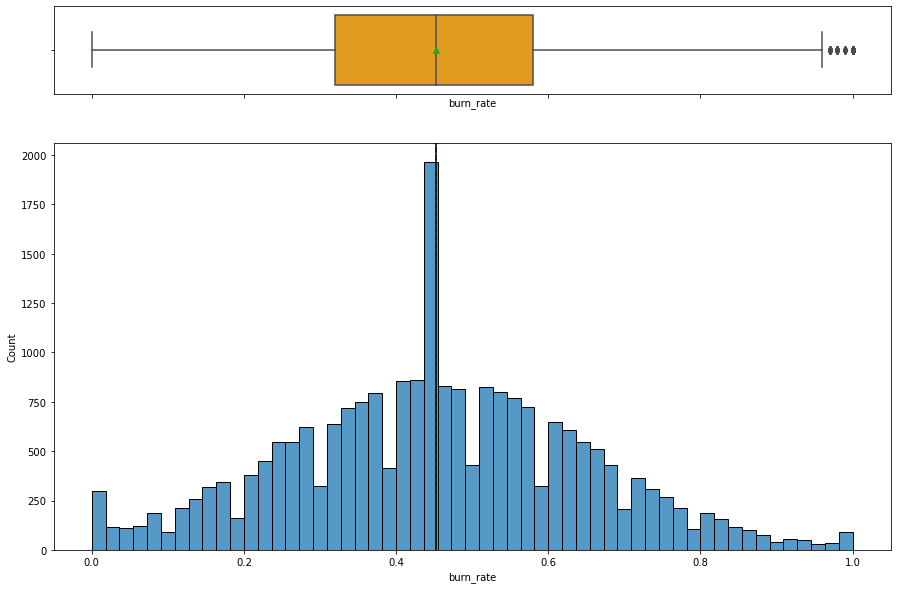

In [27]:
#Distribution of the burn rate of employees
histogram_boxplot(df,'burn_rate')

##### OBSERVATION
> - The burn rate of employees ranges mainly from 0 to 1, with very few outliers. This low burn rate implies that on an average employees do not burn out


> - The data is almost normally distributed with the mean not being so far from the median.

##### Distribution of the mental fatigue of employees

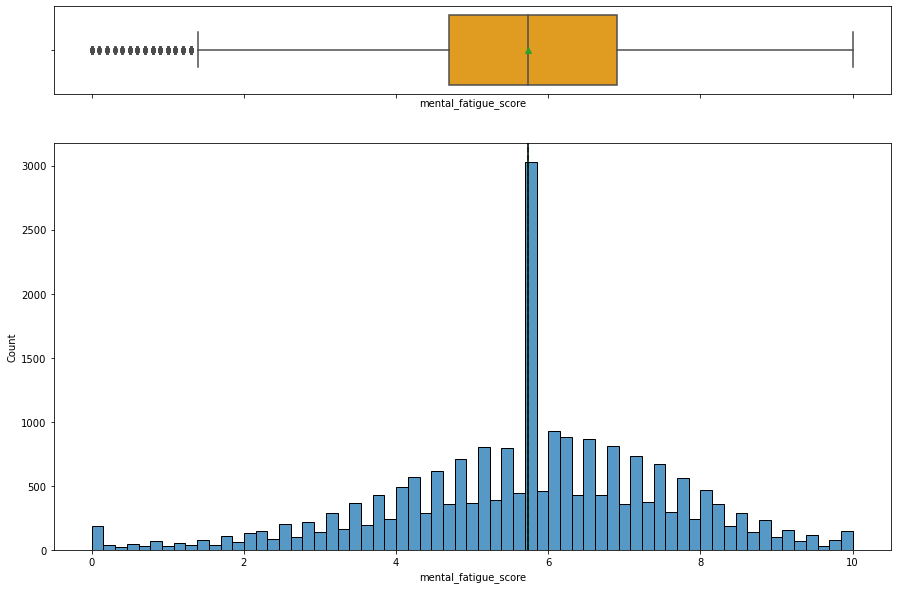

In [28]:
#distribution of the mental fatigue of employees
histogram_boxplot(df,'mental_fatigue_score')

##### OBSERVATION
> - the mental fatigue distribution of employees shows a normal distribution with mean and median of 5.6. Indicating that on an average employees tend to have a mental fatigue score of 5.6


> - A good number of employees have a fatigue score between 4 and 8

##### Distribution of the resource allocation of employees (number of working hours)

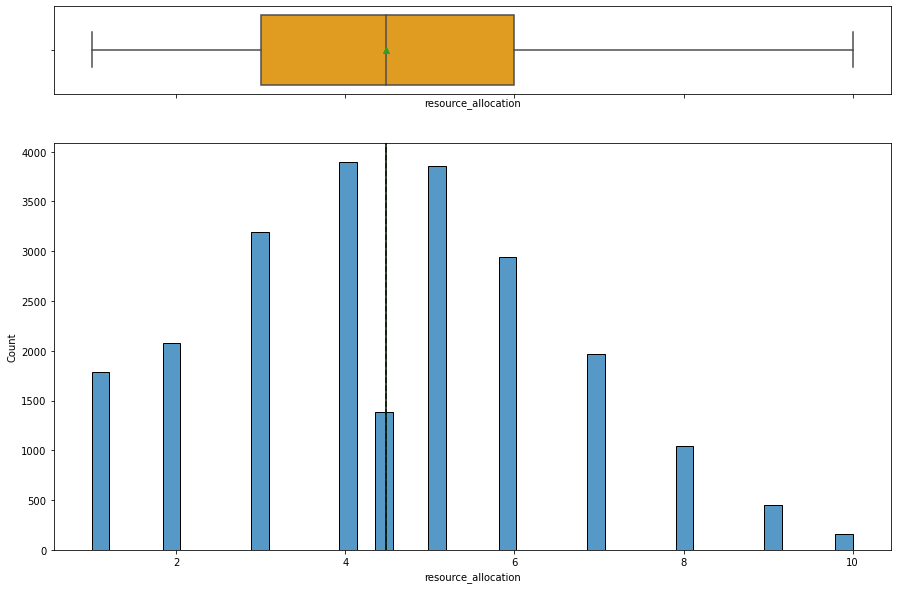

In [29]:
#distribution of the resource allocation of employees (number of working hours)
histogram_boxplot(df,'resource_allocation')

##### OBSERVATION
> - The average time an employee works is around 4.4 hours

> - Very few employees work from 8 to 10 hours and more employees work for 4 to 5 hours

##### Distribution of the designation of employees

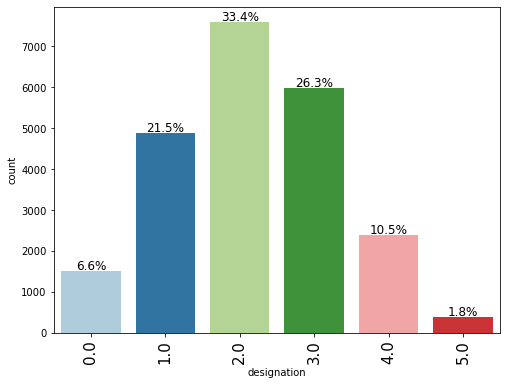

In [30]:
# distribution of the designation of employees
labeled_barplot(df,'designation')

##### OBSERVATION
> - Very few employees have reached a designation of 5 and very few are on the lowest designation also

> - Majorly, employees fall under designation of 2 and 3

##### Distribution of the work from home facility of employees

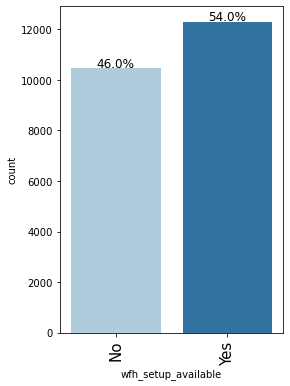

In [31]:
#distribution of the work from home facility of employees
labeled_barplot(df,'wfh_setup_available')

##### OBSERVATION
> - 54% of the entire employees have the work from home facility available and 46% do not.


##### Checking the various company types in the dataset

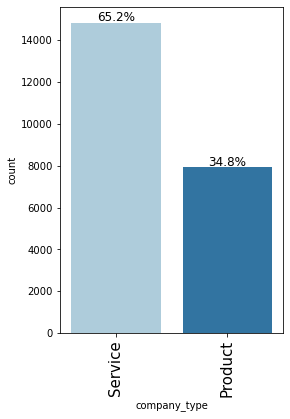

In [32]:
#checking the various company types in the dataset
labeled_barplot(df,'company_type')

##### OBSERVATION
> - There are only two company types(service and product)
> - Over 65% of employees work in the service company type.
> - Abou4 35% work in the product company type.


##### Checking the distribution of gender

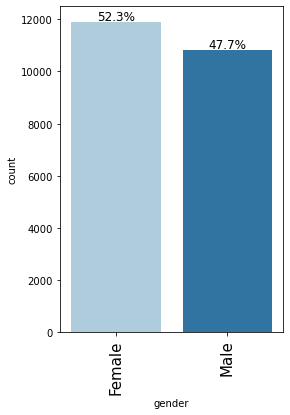

In [33]:
#Checking the distribution of gender
labeled_barplot(df,'gender')

##### OBSERVATION
> - Over 52% of employees are females


##### Which month had the highest number of employees join a company

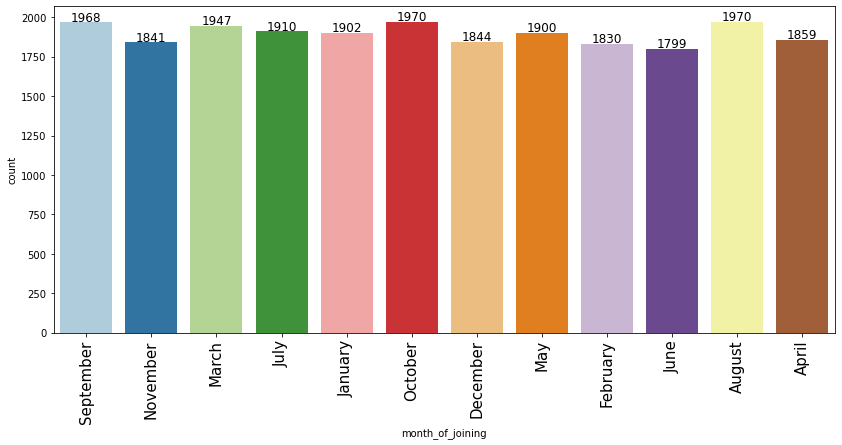

In [34]:
#Which month had the highest number of employees join a company
labeled_barplot(df,'month_of_joining',perc=False)

##### OBSERVATION
> - Most employees joined in August and October( a total of 1970 employees)

> - Followed by September,


##### What is the year distribution of the dataset

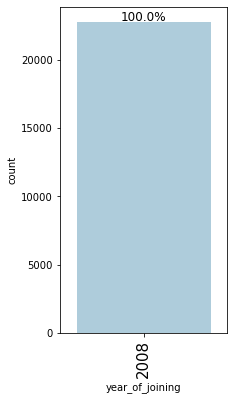

In [35]:
labeled_barplot(df,'year_of_joining')

##### OBSERVATION
> - The dataset constitute of only the year 2008

### QUESTION 2: How does the independent variable relate to the response variable (burn rate)

In [36]:
# creating a user defined function to perform a bivariate analysis on continuis variables
def joint_plot (data, predictor, target):
    
    """
    Returns a histogram plot and a scatter plot of the independent and dependent variable in the dataset

    data: dataframe
    predictor: independent variable
    target: dependent variable/ response variable
    """
        
    sns.jointplot(data=data,x=predictor,y=target,color="teal", height =8,kind='scatter')
    plt.show()
    

In [37]:
# creating a user defined function to perform a bivariate analysis on a continuous and discrete or categorical variable
def bar_plot(data, predictor, target):
    """
    Returns a bar plot of the independent and dependent variable in the dataset

    data: dataframe
    predictor: independent variable
    target: dependent variable/ response variable
    """
    
    plt.figure(figsize = (15,5))
    sns.barplot(data=data,x=predictor,y=target,ci=False)
    plt.xticks(rotation=90)
    plt.show()

In [38]:
# creating a user defined function to perform a multivariate analysis on a continuous and discrete or categorical variable
def multi_plot(data, predictor, target,hue):
    """
    Returns a bar plot of multivariate variable in the dataset

    data: dataframe
    predictor: independent variable
    target: dependent variable/ response variable
    hue: hue fo the plot
    """
    plt.figure(figsize=(10,5))
    sns.barplot(data=data, x=predictor, y=target, hue=hue, ci=False , palette="magma" )
    plt.xticks(rotation=90)
    plt.show()

##### Mental fatigue vs burn rate

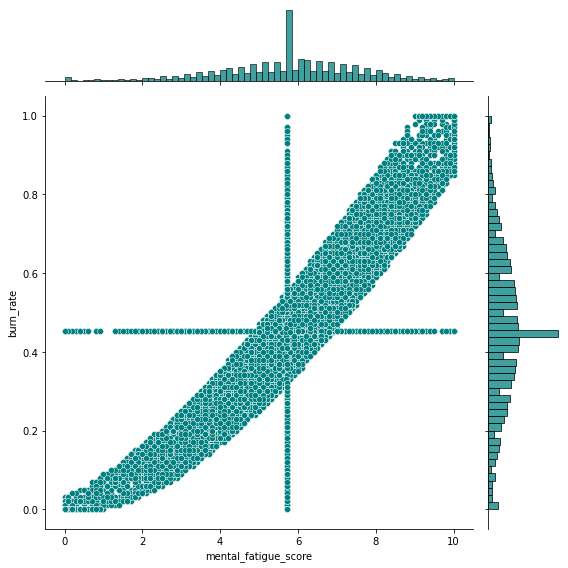

In [39]:
#Mental fatigue vs burn rate
joint_plot(df,'mental_fatigue_score','burn_rate')

##### OBSERVATION

> - There seems to be an almost positive linear relationship between mental fatigue and burn rate. Implying as one increases, the other also increases.

##### Resource allocation vs Burn rate


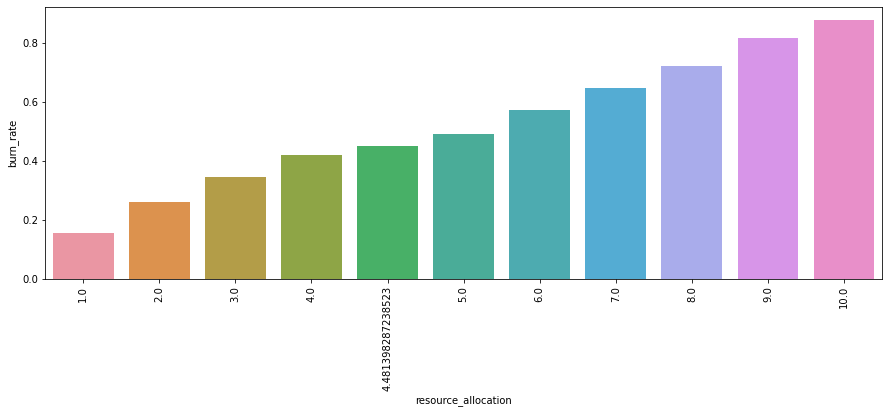

In [40]:
#resource allocation vs burn rate
bar_plot(df,'resource_allocation','burn_rate')

##### OBSERVATION

> - From the above plot, it is easy to tell that the higher the resource allocation (number of working hours) of an employee, the higher the burn rate. 


##### Designation vs Burn rate

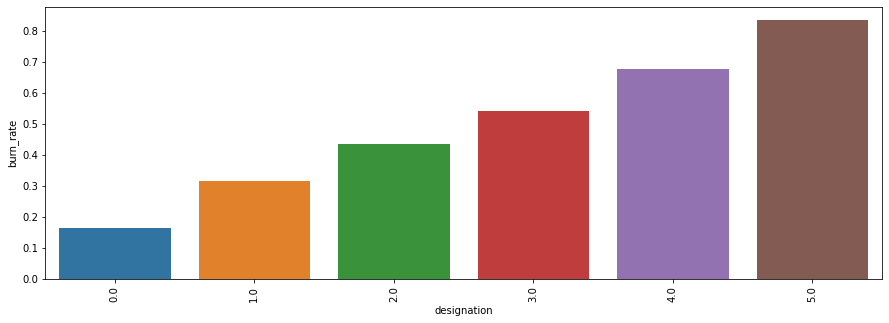

In [41]:
# Designation vs Burn rate
bar_plot(df,'designation','burn_rate')

##### OBSERVATION

> - From the above plot, it is easy to tell that the higher the designation (rank) of an employee, the higher the burn rate. 

##### Wfh_setup_available vs Burn rate

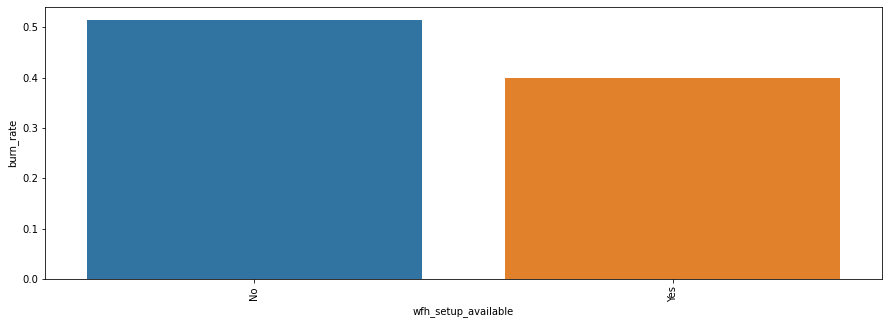

In [42]:
# Wfh_setup_available vs Burn rate
bar_plot(df,'wfh_setup_available','burn_rate')

##### OBSERVATION

> - Employees without a work from home setup available tend to burn out more than employees with a work from home option

##### Company type vs Burn out

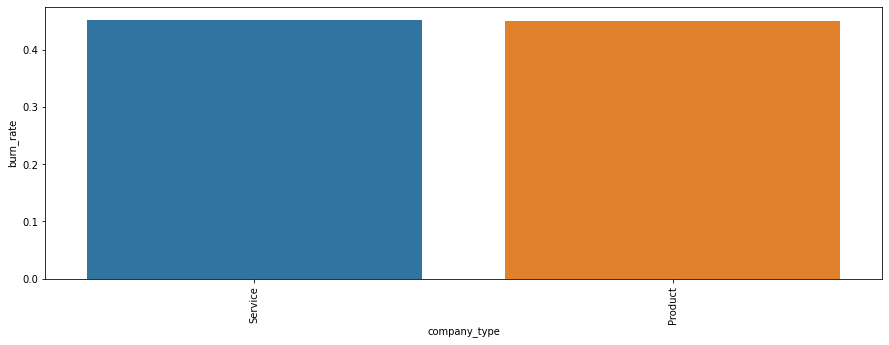

In [43]:
#Company type vs Burn out
bar_plot(df,'company_type','burn_rate')

##### OBSERVATION

> - The rate of burn out across the various company types is almost negligible.

##### Gender vs burn rate

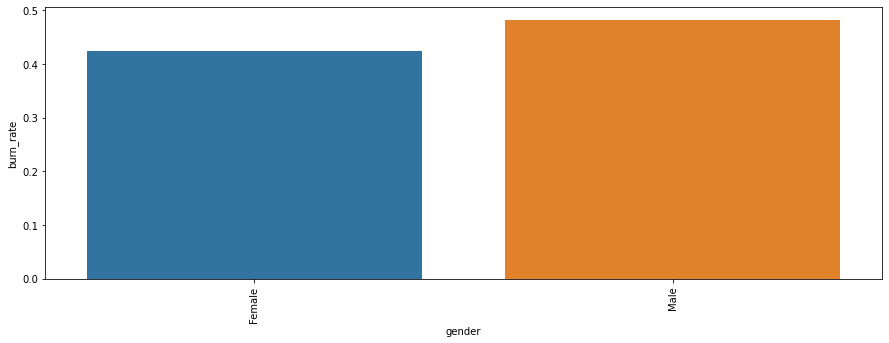

In [44]:
bar_plot(df,'gender','burn_rate')

##### OBSERVATION

> - Males tend to burn out more than females.

### QUESTION 3: Across the different company type, which gender burns out more?

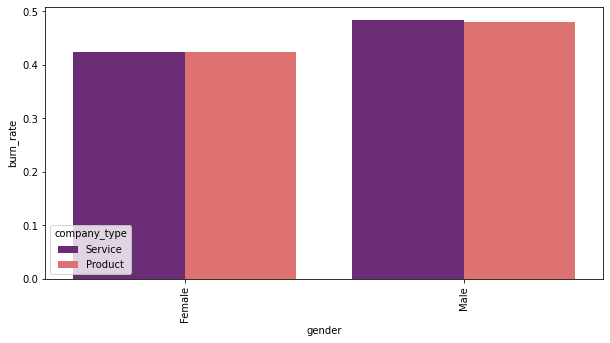

In [45]:
multi_plot(df, 'gender', 'burn_rate', 'company_type',)

##### OBSERVATION

> - The rate of burn out for the male gender is the same across the company type

> - The rate of burn out for the female gender is negligble across the company type 

### QUESTION 4: Is there any gender discrimination regarding the work from home facility provided across the different company types?

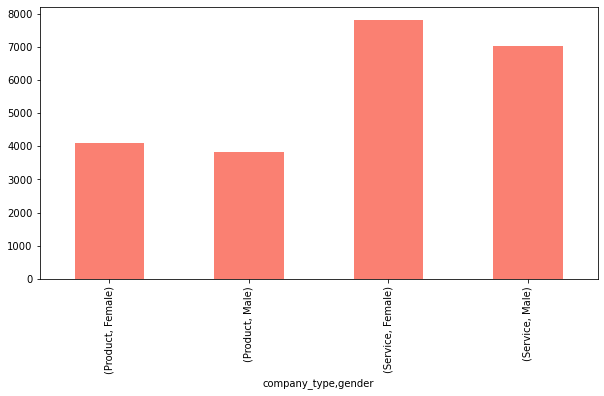

In [46]:
plt.figure(figsize=(10,5))
df.groupby(['company_type','gender'])['wfh_setup_available'].count().plot(kind='bar', color='salmon');

##### OBSERVATION

> - Considering that the ratio of females to male is greater in the entire dataset, we can not objectively say that there is any gender discrimination in the work from home set up across the company types.

### QUESTION 5: Is the resource allocation equal for both genders across the different company types?

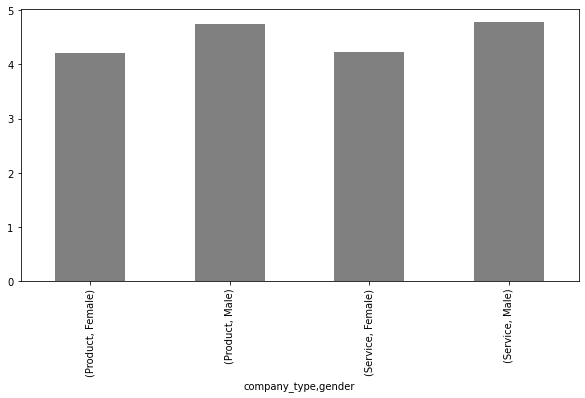

In [47]:
plt.figure(figsize=(10,5))
df.groupby(['company_type','gender'])['resource_allocation'].mean().plot(kind='bar', color='grey');

##### OBSERVATION

> - Across the different company types, on an average, it seems the male employees tend to work more hours a little above  the female employees.

### QUESTION 6: Which company type suffers more mental fatigue

<AxesSubplot:xlabel='company_type'>

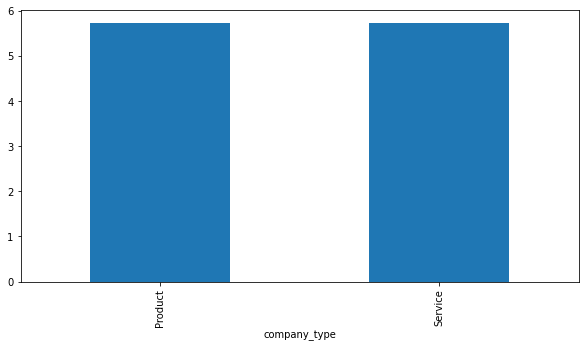

In [48]:
plt.figure(figsize=(10,5))
df.groupby('company_type')['mental_fatigue_score'].mean().plot(kind='bar')

##### OBSERVATION

> - Across the different company types, on an average, it seems the mental fatigue rate is the same.

### QUESTION 7: What is the relationship like across the independent variables

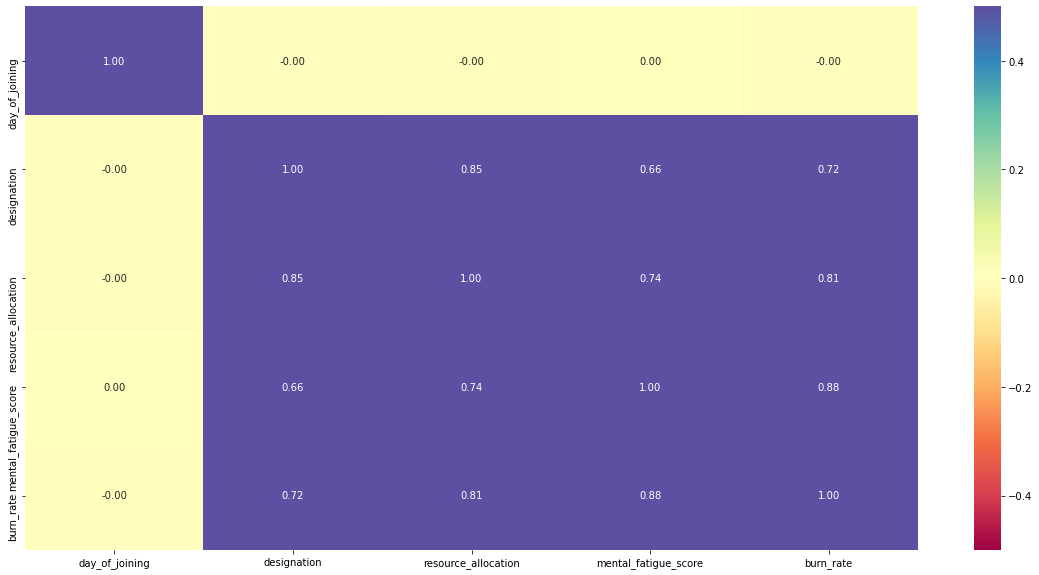

In [49]:
# Using a heatmap to view the correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(df.drop('year_of_joining',axis=1).corr(),vmin=-0.5,vmax=0.5,annot=True,fmt='.2f',cmap="Spectral")
plt.show()

##### OBSERVATION

> - Multi collinearity is most likely present as the independent variables have a strong correlation to each other.

> - Designation, resource allocation and mental fatigue are highly correlated to each other.

> - Burn rate also has a high correlation to the 3 mentioned above variables

> - Note that correlation does not imply causation.